<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/greenindex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
Daejeon=pd.read_excel('./Daejeon_merge_2018.xlsx')
Daejeon=Daejeon[['x','y']]
Daejeon

,x,y
0,127.374310,36.351404
1,127.374310,36.351404
2,127.364982,36.353085
3,127.340423,36.353466
4,127.340423,36.353466
...,...,...
19597,127.445469,36.361047
19598,127.445469,36.361047
19599,127.445469,36.361047
19600,127.332138,36.349004


In [2]:
Daejeon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19602 entries, 0 to 19601
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       19602 non-null  float64
 1   y       19602 non-null  float64
dtypes: float64(2)
memory usage: 306.4 KB


In [3]:
Daejeon['x'].value_counts

<bound method IndexOpsMixin.value_counts of 0        127.374310
1        127.374310
2        127.364982
3        127.340423
4        127.340423
            ...    
19597    127.445469
19598    127.445469
19599    127.445469
19600    127.332138
19601    127.345710
Name: x, Length: 19602, dtype: float64>

In [4]:
Daejeon['y'].value_counts

<bound method IndexOpsMixin.value_counts of 0        36.351404
1        36.351404
2        36.353085
3        36.353466
4        36.353466
           ...    
19597    36.361047
19598    36.361047
19599    36.361047
19600    36.349004
19601    36.358145
Name: y, Length: 19602, dtype: float64>

In [5]:
Daejeon.drop_duplicates()

,x,y
0,127.374310,36.351404
2,127.364982,36.353085
3,127.340423,36.353466
9,127.470424,36.282760
39,127.343024,36.354192
...,...,...
19589,127.435473,36.445916
19591,127.448098,36.356400
19592,127.445469,36.361047
19600,127.332138,36.349004


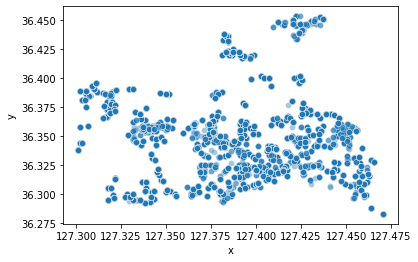

In [7]:
import seaborn as sns
sns.scatterplot(data=Daejeon,x='x',y='y',alpha=0.4)

In [84]:
Daejeon1=pd.read_csv('./Dae.csv',encoding='cp949')
import matplotlib.pyplot as plt
Daejeon1

,Number,계약년,계약월,계약일,전용면적(㎡),거래금액(만원),층,건축년도,도시,구,동,도로명,아파트 이름,x,y,지하철과의 직선거리,지하철과의 도로망거리,최고층,세대수,총동수,가구당주차대수,난방연료,서울대입학자,고등학교수,CBD,녹지거리,수변거리,버스정류장수,인구,남자,여자,성비,중위연령,15세이하인구,65세이상인구,인구밀도,고학력자
0,1,2018,3,29,19.0734,"7,980",NaN,2017,대전광역시,서구,둔산동,대덕대로185번길 62,(1088-1),127.374310,36.351404,651.193259,902.176761,10,98,1,0.52,도시가스,32,17,1039.805102,375.496947,1515.733052,15,37654,18286,19368,94.413466,38,15.355606,6.745631,15689.166670,43.737450
1,2,2018,3,29,19.0734,"7,980",NaN,2017,대전광역시,서구,둔산동,대덕대로185번길 62,(1088-1),127.374310,36.351404,651.193259,902.176761,10,98,1,0.52,도시가스,32,17,1039.805102,375.496947,1515.733052,15,37654,18286,19368,94.413466,38,15.355606,6.745631,15689.166670,43.737450
2,3,2018,9,4,84.6800,"9,000",NaN,1990,대전광역시,서구,갈마동,신갈마로211번길 53,(296-1),127.364982,36.353085,516.020591,714.905719,5,10,1,자료없음,자료없음,26,14,1986.038711,138.253448,790.797156,7,22048,11176,10872,102.796174,38,10.091618,10.867199,14698.666670,29.823942
3,4,2018,1,21,165.3150,"55,000",NaN,2008,대전광역시,유성구,봉명동,계룡로 92,CJ나인파크,127.340423,36.353466,89.138112,99.834685,27,168,2,3.29,도시가스,18,13,4434.216713,124.185364,368.796502,23,32123,16628,15495,107.312036,36,6.630763,11.306540,2301.074499,35.568299
4,5,2018,5,4,170.7280,"56,000",NaN,2008,대전광역시,유성구,봉명동,계룡로 92,CJ나인파크,127.340423,36.353466,89.138112,99.834685,27,168,2,3.29,도시가스,18,13,4434.216713,124.185364,368.796502,23,32123,16628,15495,107.312036,36,6.630763,11.306540,2301.074499,35.568299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19597,19598,2018,6,21,84.7800,"14,600",NaN,1995,대전광역시,대덕구,송촌동,동춘당로23번길 4,흥진로얄,127.445469,36.361047,3160.672223,4378.861405,11,87,1,0.75,도시가스,7,8,6173.861000,161.624039,845.650714,10,29359,14497,14862,97.544072,39,14.850642,8.304098,15291.145830,30.269211
19598,19599,2018,9,11,84.7800,"15,000",NaN,1995,대전광역시,대덕구,송촌동,동춘당로23번길 4,흥진로얄,127.445469,36.361047,3160.672223,4378.861405,11,87,1,0.75,도시가스,7,8,6173.861000,161.624039,845.650714,10,17559,8823,8736,100.995879,42,11.384475,13.782106,5241.492537,23.489717
19599,19600,2018,11,15,58.4650,"11,000",NaN,1995,대전광역시,대덕구,송촌동,동춘당로23번길 4,흥진로얄,127.445469,36.361047,3160.672223,4378.861405,11,87,1,0.75,도시가스,7,8,6173.861000,161.624039,845.650714,10,29359,14497,14862,97.544072,39,14.850642,8.304098,15291.145830,30.269211
19600,19601,2018,11,27,84.0800,"18,800",NaN,2009,대전광역시,유성구,구암동,월드컵대로253번안길 56,희상원,127.332138,36.349004,773.437263,1071.536161,8,19,1,1.16,도시가스,18,13,5253.815338,163.536168,778.253986,13,32123,16628,15495,107.312036,36,6.630763,11.306540,2301.074499,35.568299


In [147]:
print(Daejeon['x'].max())
print(Daejeon['y'].max())
print(Daejeon['x'].min())
print(Daejeon['y'].min())

127.470424
36.453431
127.301355
36.282759999999996


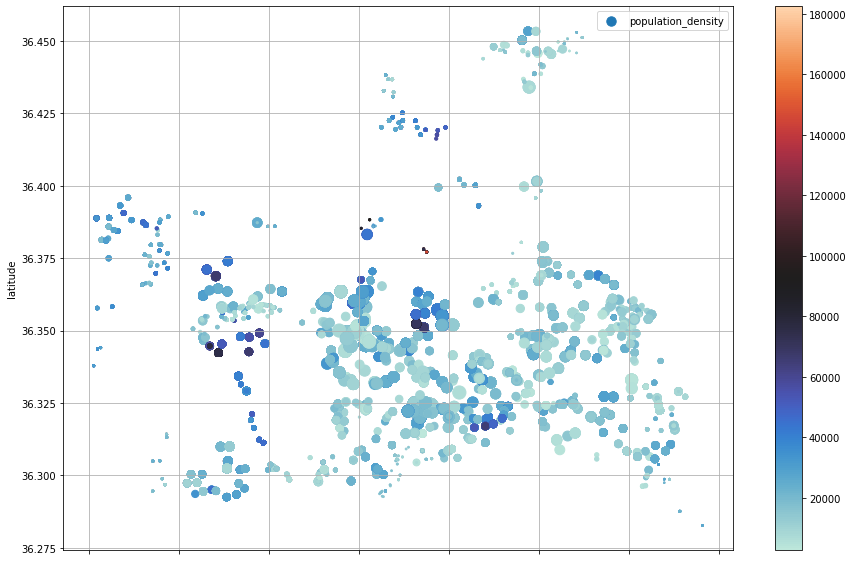

In [146]:
Daejeon1.plot(kind='scatter',x='x',y='y',s=Daejeon1['인구밀도']/200, label='population_density', figsize=(15,10), 
             c=Daejeon1['거래금액(만원)'], 
             cmap='icefire',
             colorbar=True)
plt.legend()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid()
plt.show()

In [71]:
m=Daejeon1['거래금액(만원)']
m=pd.DataFrame(m)
m.to_csv('./pass.csv',encoding='utf-8-sig')

In [72]:
mm=pd.read_csv('./pass.csv')
mm=mm.drop(['Unnamed: 0'], axis=1)

In [73]:
mm

,거래금액(만원)
0,"7,980"
1,"7,980"
2,"9,000"
3,"55,000"
4,"56,000"
...,...
19597,"14,600"
19598,"15,000"
19599,"11,000"
19600,"18,800"


In [109]:
ss=mm.replace(',','')

In [114]:
price=pd.read_csv('price.txt')
price=price.reset_index()
price

,index,거래금액(만원)
0,7,980
1,7,980
2,9,0
3,55,0
4,56,0
...,...,...
19597,14,600
19598,15,0
19599,11,0
19600,18,800


In [117]:
price['거래금액']=price['index']*1000+price['거래금액(만원)']
price=price.drop(['index','거래금액(만원)'],axis=1)
price

,거래금액
0,7980
1,7980
2,9000
3,55000
4,56000
...,...
19597,14600
19598,15000
19599,11000
19600,18800


In [118]:
Daejeon1['거래금액(만원)']=price